# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


     

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambilobe
Processing Record 2 of Set 1 | srednekolymsk
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | samatau
City not found. Skipping...
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | road town
Processing Record 8 of Set 1 | kisanga
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | norrtalje
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | sangin
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | nemuro
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | magadi
Processing Record 22 of Set 1 | vaitup

Processing Record 34 of Set 4 | kaitangata
Processing Record 35 of Set 4 | neuquen
Processing Record 36 of Set 4 | qianan
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | anadyr
Processing Record 39 of Set 4 | verkhoyansk
Processing Record 40 of Set 4 | norsup
Processing Record 41 of Set 4 | san onofre
Processing Record 42 of Set 4 | flinders
Processing Record 43 of Set 4 | mouila
Processing Record 44 of Set 4 | tilichiki
Processing Record 45 of Set 4 | meulaboh
Processing Record 46 of Set 4 | karaul
City not found. Skipping...
Processing Record 47 of Set 4 | ozgon
City not found. Skipping...
Processing Record 48 of Set 4 | coruripe
Processing Record 49 of Set 4 | doha
Processing Record 50 of Set 4 | kalakamati
Processing Record 1 of Set 5 | kisangani
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | kalaleh
Processing Record 4 of Set 5 | rapid city
Processing Record 5 of Set 5 | milingimbi
City not found. Skipping...
Processing Record 6 

Processing Record 23 of Set 8 | kurilsk
Processing Record 24 of Set 8 | nador
Processing Record 25 of Set 8 | tual
Processing Record 26 of Set 8 | smidovich
Processing Record 27 of Set 8 | norman wells
Processing Record 28 of Set 8 | ribeira grande
Processing Record 29 of Set 8 | broome
Processing Record 30 of Set 8 | yuanping
Processing Record 31 of Set 8 | danielskuil
Processing Record 32 of Set 8 | zhetysay
Processing Record 33 of Set 8 | milledgeville
Processing Record 34 of Set 8 | vozhega
Processing Record 35 of Set 8 | launceston
Processing Record 36 of Set 8 | abilene
Processing Record 37 of Set 8 | yanam
Processing Record 38 of Set 8 | aykhal
Processing Record 39 of Set 8 | calvinia
Processing Record 40 of Set 8 | talnakh
Processing Record 41 of Set 8 | marsa matruh
Processing Record 42 of Set 8 | hambantota
Processing Record 43 of Set 8 | my tho
Processing Record 44 of Set 8 | dikson
Processing Record 45 of Set 8 | roswell
Processing Record 46 of Set 8 | rosh pinna
Processing

Processing Record 10 of Set 12 | iqaluit
Processing Record 11 of Set 12 | constitucion
Processing Record 12 of Set 12 | japura
Processing Record 13 of Set 12 | canto do buriti
Processing Record 14 of Set 12 | virginia beach
Processing Record 15 of Set 12 | mayor pablo lagerenza
Processing Record 16 of Set 12 | tabou
Processing Record 17 of Set 12 | hendijan
City not found. Skipping...
Processing Record 18 of Set 12 | krasnyy chikoy
Processing Record 19 of Set 12 | kirakira
Processing Record 20 of Set 12 | grand gaube
Processing Record 21 of Set 12 | bonthe
Processing Record 22 of Set 12 | savannah bight
Processing Record 23 of Set 12 | namibe
Processing Record 24 of Set 12 | porto walter
Processing Record 25 of Set 12 | karaman
Processing Record 26 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 27 of Set 12 | klyuchi
Processing Record 28 of Set 12 | yuli
Processing Record 29 of Set 12 | ola
Processing Record 30 of Set 12 | katsuura
Processing Record 31 of Set 12 | d

In [4]:

# Create the dataframe from the lists we generated from last cell
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambilobe,-13.2000,49.0500,22.27,89,6,1.51,MG,2022-12-05 02:23:07
1,Srednekolymsk,67.4500,153.6833,-43.95,100,63,1.32,RU,2022-12-05 02:23:08
2,Georgetown,5.4112,100.3354,27.96,85,20,0.00,MY,2022-12-05 02:23:08
3,Thompson,55.7435,-97.8558,-28.91,69,20,3.60,CA,2022-12-05 02:23:08
4,Rikitea,-23.1203,-134.9692,24.19,81,89,5.18,PF,2022-12-05 02:23:09
5,Road Town,18.4167,-64.6167,25.05,73,20,2.57,VG,2022-12-05 02:23:09
6,Kisanga,-7.4362,37.7034,21.90,92,91,1.04,TZ,2022-12-05 02:23:10
7,Saint-Philippe,-21.3585,55.7679,23.77,82,31,3.84,RE,2022-12-05 02:23:10
8,Norrtalje,59.7580,18.7050,-1.66,91,98,0.81,SE,2022-12-05 02:23:10
9,Arraial Do Cabo,-22.9661,-42.0278,22.72,89,100,12.74,BR,2022-12-05 02:23:11


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambilobe,-13.2000,49.0500,22.27,89,6,1.51,MG,2022-12-05 02:23:07
1,Srednekolymsk,67.4500,153.6833,-43.95,100,63,1.32,RU,2022-12-05 02:23:08
2,Georgetown,5.4112,100.3354,27.96,85,20,0.00,MY,2022-12-05 02:23:08
3,Thompson,55.7435,-97.8558,-28.91,69,20,3.60,CA,2022-12-05 02:23:08
4,Rikitea,-23.1203,-134.9692,24.19,81,89,5.18,PF,2022-12-05 02:23:09


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ambilobe,-13.2000,49.0500,22.27,89,6,1.51,MG,2022-12-05 02:23:07
1,Srednekolymsk,67.4500,153.6833,-43.95,100,63,1.32,RU,2022-12-05 02:23:08
2,Georgetown,5.4112,100.3354,27.96,85,20,0.00,MY,2022-12-05 02:23:08
3,Thompson,55.7435,-97.8558,-28.91,69,20,3.60,CA,2022-12-05 02:23:08
4,Rikitea,-23.1203,-134.9692,24.19,81,89,5.18,PF,2022-12-05 02:23:09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

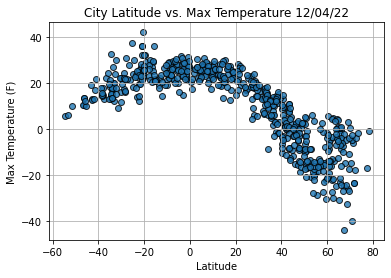

In [9]:
# Build scatter plot for latitude vs. temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

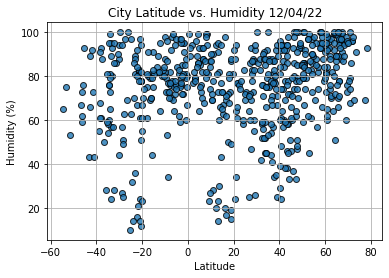

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

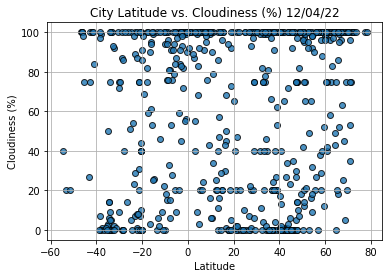

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

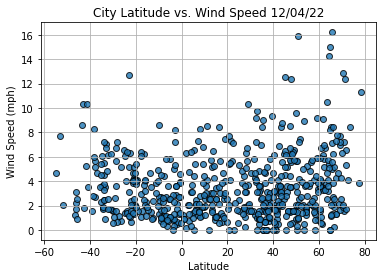

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
# Import linregress
from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13


     

City                       Sangin
Lat                       32.0728
Lng                       64.8359
Max Temp                     7.62
Humidity                       42
Cloudiness                     11
Wind Speed                   1.24
Country                        AF
Date          2022-12-05 02:23:12
Name: 13, dtype: object

In [14]:

# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Srednekolymsk,67.4500,153.6833,-43.95,100,63,1.32,RU,2022-12-05 02:23:08
2,Georgetown,5.4112,100.3354,27.96,85,20,0.00,MY,2022-12-05 02:23:08
3,Thompson,55.7435,-97.8558,-28.91,69,20,3.60,CA,2022-12-05 02:23:08
5,Road Town,18.4167,-64.6167,25.05,73,20,2.57,VG,2022-12-05 02:23:09
8,Norrtalje,59.7580,18.7050,-1.66,91,98,0.81,SE,2022-12-05 02:23:10


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Srednekolymsk,67.4500,153.6833,-43.95,100,63,1.32,RU,2022-12-05 02:23:08
2,Georgetown,5.4112,100.3354,27.96,85,20,0.00,MY,2022-12-05 02:23:08
3,Thompson,55.7435,-97.8558,-28.91,69,20,3.60,CA,2022-12-05 02:23:08
5,Road Town,18.4167,-64.6167,25.05,73,20,2.57,VG,2022-12-05 02:23:09
8,Norrtalje,59.7580,18.7050,-1.66,91,98,0.81,SE,2022-12-05 02:23:10


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Ambilobe,-13.2000,49.0500,22.27,89,6,1.51,MG,2022-12-05 02:23:07
4,Rikitea,-23.1203,-134.9692,24.19,81,89,5.18,PF,2022-12-05 02:23:09
6,Kisanga,-7.4362,37.7034,21.90,92,91,1.04,TZ,2022-12-05 02:23:10
7,Saint-Philippe,-21.3585,55.7679,23.77,82,31,3.84,RE,2022-12-05 02:23:10
9,Arraial Do Cabo,-22.9661,-42.0278,22.72,89,100,12.74,BR,2022-12-05 02:23:11


###  Temperature vs. Latitude Linear Regression Plot

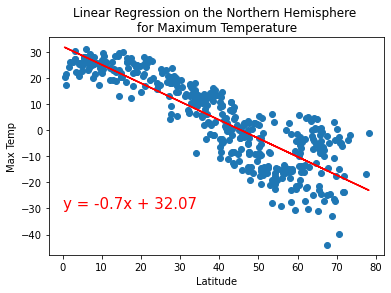

In [23]:
# Linear regression on Northern Hemisphere


# Linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(0,-30))


  

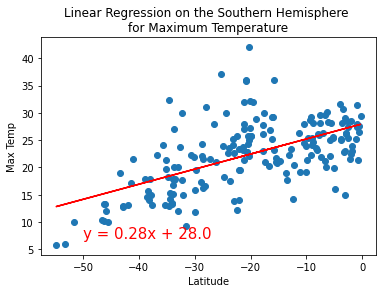

In [24]:
# Linear regression on Southern Hemisphere
# Linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,7))



**Discussion about the linear relationship: Latitude and maximum temperature have a significant negative correlation in the Northern Hemisphere.Latitude and maximum temperature exhibit a moderately positive correlation in the Southern Hemisphere.Both indicate that the maximum temperature will rise closer to zero at a latitude.

### Humidity vs. Latitude Linear Regression Plot

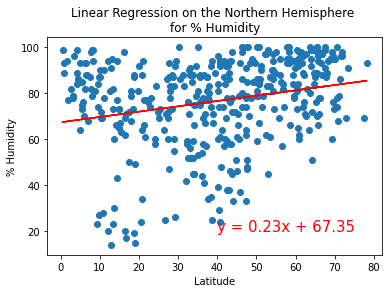

In [25]:
# Northern Hemisphere
# Linear regression on the Northern Hemisphere for Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,20))



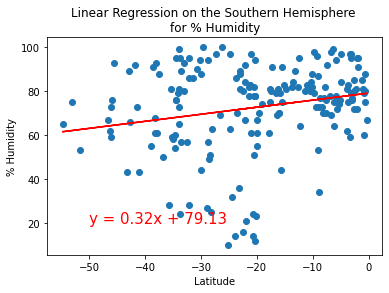

In [26]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere for Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,20))



**Discussion about the linear relationship: The correlation between humidity and latitude is negligible in both the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

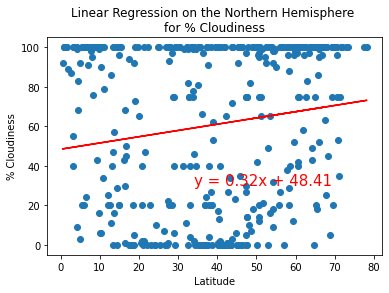

In [27]:
# Northern Hemisphere

# Linear regression on the Northern Hemisphere for Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(34,30))



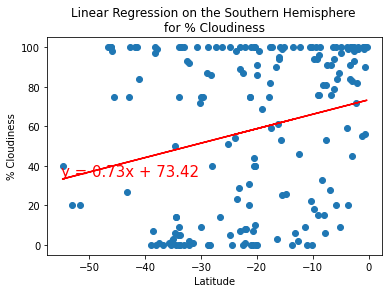

In [28]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere for Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-55,35))



**Discussion about the linear relationship: The correlation between cloudiness and latitude is negligible in both the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

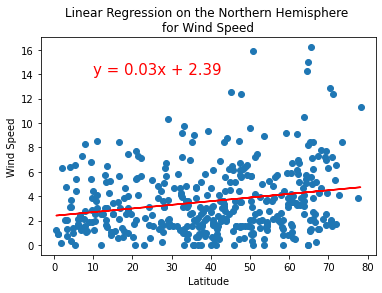

In [31]:
# Northern Hemisphere
# Linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,14))



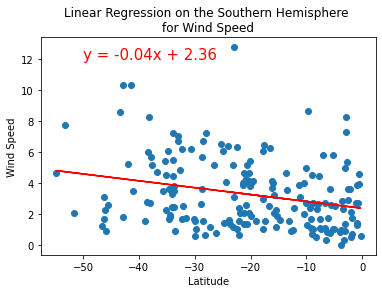

In [30]:
# Southern Hemisphere
# Linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,12))



**Discussion about the linear relationship: The correlation between wind speed and latitude is negligible in both the northern and southern hemispheres.